In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Import dataset
data = pd.read_csv("diabetes_clean.csv")

# Define Target and Feature values
X = data.drop(columns=['diabetes'])
y = data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.2947222  0.19805919 0.14438579 0.16915495 0.51156357 0.47996867
 0.01556203 0.60399811 0.5376586  0.78698769]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


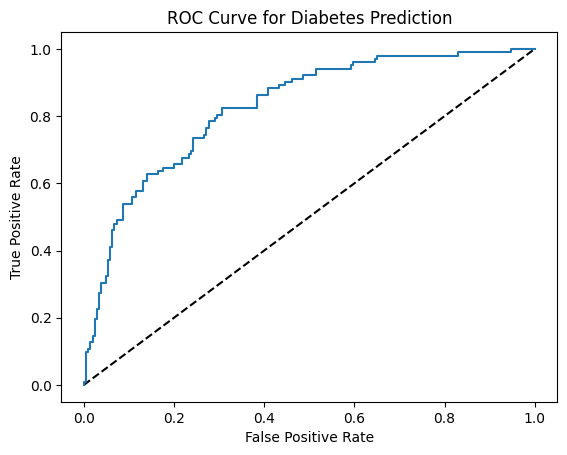

In [6]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

In [11]:

from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))



0.8260517799352751
